## Treinamento e teste dos modelos "svm" e "linear_model" <br>
Testes e análise de resultado dos modelos

In [2]:
#Import das bibliotecas ultilizadas
import dlib
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline

In [3]:
#Abrindo os arquivos com os dados base coletados anteriormente.
dataframeDormindo = pd.read_csv('Base_Dormindo.cvs')
dataframeNormal   = pd.read_csv('Base_Normal.cvs')

In [4]:
dataframeNormal.columns = dataframeDormindo.columns

In [5]:
#APAGAR COLUNA
    #dataframeDormindo.drop('Unnamed: 0', inplace=True, axis=1)
#Adiciona coluna tag
    #dataframeDormindo['tag'] = "dormindo"
    #dataframeDormindo

#____________________________________________________________________
#____________________________________________________________________

#APAGAR COLUNA
    #dataframeNormal.drop('Unnamed: 0', inplace=True, axis=1) 
#Adiciona coluna tag
    #dataframeNormal['tag'] = "normal"
    #dataframeNormal

In [6]:
#Salvar os dados sem considerar o index
    #dataframeDormindo.to_csv("Base_Dormindo.cvs",index=False)
    #dataframeNormal.to_csv("Base_Normal.cvs",index=False)

In [7]:
#data frame "dataTeste" recebe as base de dados
dataTeste = dataframeDormindo.append(dataframeNormal, ignore_index=True) 

In [8]:
#Embaralhamos as linhas para os dados não ficarem alinhados
dataTeste = dataTeste.reindex(np.random.permutation(dataTeste.index))
dataTeste = dataTeste.reset_index(drop=True)

#substituido por random_state=1 na funcao train_test_split para buscar dados de froma aleatoria.

## Treinar os modelos

In [9]:
#Import da biblioteca e do modulo para dividir os dados para teste e para treianmento
from sklearn.model_selection import train_test_split

In [10]:
#Separando os dados

#Retirando a coluna "tag" e salvando
X = dataTeste.drop('tag',axis=1)
#Cria a coluna novamente porém sem os dados
y = dataTeste['tag']
#Separamos os dados e definimos 30% de dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.30)

In [11]:
#import da biblioteca e dos modulos dos modelos para treinamento
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [12]:
#Definimos as variavis para os modelos
svc_model = SVC()
lr_model = LogisticRegression()
#xgbr_model = XGBRegressor(gamma='scale')
xgbr_model = XGBClassifier()

In [13]:
#Trinando os modelos

#Passamos pasamos os dados com "resposta" para treinar os modelos
svc_model.fit(X_train,y_train)

SVC()

In [14]:
lr_model.fit(X_train,y_train)

C:\Users\vand3\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [15]:
xgbr_model.fit(X_train,y_train)

XGBClassifier()

## Avaliar o modelo

Matriz de Confusão e Relatório de Classificação.

In [16]:
#Enviando os dados para o modelo de previsão para testar e pegando o resultado nas variaveis
svc_predictions = svc_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)
xgbr_predictions = xgbr_model.predict(X_test)

In [61]:
#Importando a biblioteca com os modulos de report e matriz de confusão
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score

In [18]:
#Imprimindo a matriz de confusão passando os dados de teste com os resultados obtidos pelo modelo
print(confusion_matrix(y_test,svc_predictions))
print(confusion_matrix(y_test,lr_predictions))
print(confusion_matrix(y_test,xgbr_predictions))

[[13  5]
 [ 2 14]]
[[16  2]
 [ 5 11]]
[[16  2]
 [ 5 11]]


Text(0.5, 0.98, 'SVM')

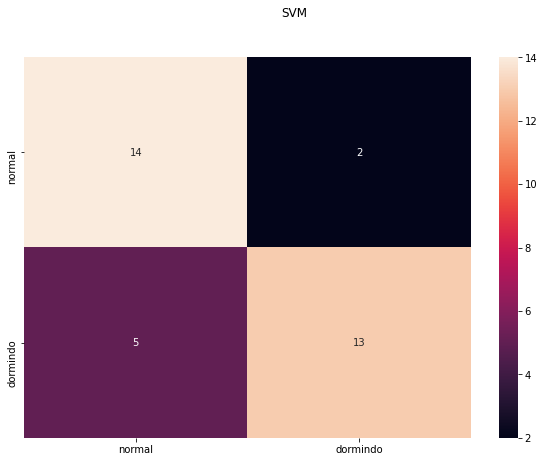

In [40]:
#grafico matrix conufsao.
m=confusion_matrix(y_test,svc_predictions,y_test.unique())
dfm = pd.DataFrame(m, index = [i for i in y_test.unique()
],
                  columns = [i for i in y_test.unique()])

plt.figure(figsize = (10,7))

graph=sns.heatmap(dfm, annot=True)
graph.figure.suptitle('SVM')


In [20]:
#Imprimindo o modelo passando os dados de teste com os resultados obtidos pelo modelo
print("SVM")
print(classification_report(y_test,svc_predictions))
print("Regressão Logistica")
print(classification_report(y_test,lr_predictions))
print("Classificação com XGBoost")
print(classification_report(y_test,xgbr_predictions))

SVM
              precision    recall  f1-score   support

    dormindo       0.87      0.72      0.79        18
      normal       0.74      0.88      0.80        16

    accuracy                           0.79        34
   macro avg       0.80      0.80      0.79        34
weighted avg       0.81      0.79      0.79        34

Regressão Logistica
              precision    recall  f1-score   support

    dormindo       0.76      0.89      0.82        18
      normal       0.85      0.69      0.76        16

    accuracy                           0.79        34
   macro avg       0.80      0.79      0.79        34
weighted avg       0.80      0.79      0.79        34

Classificação com XGBoost
              precision    recall  f1-score   support

    dormindo       0.76      0.89      0.82        18
      normal       0.85      0.69      0.76        16

    accuracy                           0.79        34
   macro avg       0.80      0.79      0.79        34
weighted avg       0.80 

In [45]:
#f1 Score
Gsvc=f1_score(y_test, svc_predictions, average=None)
Glr=f1_score(y_test, lr_predictions, average=None)
Gxgbr=f1_score(y_test, xgbr_predictions, average=None)

In [59]:
print('F1 SCORE')
print(f'SVM \r\n - Dormindo {Gsvc[0]:5.2f} \ Normal {Gsvc[1]:5.2f}')
print(f'Regressão Logistica \r\n - Dormindo {Glr[0]:5.2f} \ Normal {Glr[1]:5.2f}')
print(f'XGBoost \r\n - Dormindo {Gxgbr[0]:5.2f} \ Normal {Gxgbr[1]:5.2f}')

F1 SCORE
SVM 
 - Dormindo  0.79 \ Normal  0.80
Regressão Logistica 
 - Dormindo  0.82 \ Normal  0.76
XGBoost 
 - Dormindo  0.82 \ Normal  0.76


In [63]:
#precisão
#f1 Score
Gsvc=precision_score(y_test, svc_predictions, average=None)
Glr=precision_score(y_test, lr_predictions, average=None)
Gxgbr=precision_score(y_test, xgbr_predictions, average=None)

In [64]:
print('Precisão')
print(f'SVM \r\n - Dormindo {Gsvc[0]:5.2f} \ Normal {Gsvc[1]:5.2f}')
print(f'Regressão Logistica \r\n - Dormindo {Glr[0]:5.2f} \ Normal {Glr[1]:5.2f}')
print(f'XGBoost \r\n - Dormindo {Gxgbr[0]:5.2f} \ Normal {Gxgbr[1]:5.2f}')

Precisão
SVM 
 - Dormindo  0.87 \ Normal  0.74
Regressão Logistica 
 - Dormindo  0.82 \ Normal  0.76
XGBoost 
 - Dormindo  0.82 \ Normal  0.76


## Salvando os modelos treinados

In [ ]:
import pickle

In [ ]:
pickle.dump(svc_model, open('svc_model', 'wb'))
#pickle.dump(lr_model, open('lr_model', 'wb'))
#pickle.dump(xgbr_model, open('xgbr_model', 'wb'))

In [ ]:
svc_model_load = pickle.load(open('svc_model', 'rb'))
#lr_model_load = pickle.load(open('lr_model', 'rb'))
#xgbr_model_load = pickle.load(open('xgbr_model', 'rb'))

In [ ]:
svc_predictions_load = svc_model_load.predict(X_test)

In [ ]:
print(classification_report(y_test,svc_predictions_load))
print(classification_report(y_test,svc_predictions))

## Versão Bibliotecas

In [ ]:
pip list